# 911 Calls Capstone Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("911.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Check the head of df **

In [4]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,12/10/2015 17:40,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,12/10/2015 17:40,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,12/10/2015 17:40,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,12/10/2015 17:40,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,12/10/2015 17:40,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Top 5 zipcodes for 911 calls.

In [5]:
df["zip"].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

## Top 5 townships (twp) for 911 calls.

In [6]:
df["twp"].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

## Unique title codes in 'title' column.

In [7]:
df["title"].nunique()

110

In [8]:
df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e'], dtype='object')

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Using .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [9]:
R = df["title"].str.split(":")
df["Reason"] = R.apply(lambda x: x[0])
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,12/10/2015 17:40,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,12/10/2015 17:40,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,12/10/2015 17:40,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,12/10/2015 17:40,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,12/10/2015 17:40,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


## Most common Reason for a 911 call based off of this new column.

In [10]:
df["Reason"].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

## Now using seaborn to create a countplot of 911 calls by Reason.

c:\users\nisha\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


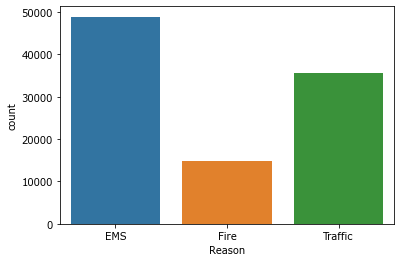

In [11]:
sns.countplot(df["Reason"])
plt.show()

## Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? 

In [12]:
df["timeStamp"]

0        12/10/2015 17:40
1        12/10/2015 17:40
2        12/10/2015 17:40
3        12/10/2015 17:40
4        12/10/2015 17:40
               ...       
99487    08/24/2016 11:06
99488    08/24/2016 11:07
99489    08/24/2016 11:12
99490    08/24/2016 11:17
99491    08/24/2016 11:17
Name: timeStamp, Length: 99492, dtype: object

In [13]:
df["timeStamp"].dtype

dtype('O')

In [14]:
type(df["timeStamp"].iloc[0])

str

## We should have seen that these timestamps are still strings. Using [pd.to_datetime] to convert the column from strings to DateTime objects.

In [15]:
df["timeStamp"] = pd.to_datetime(df["timeStamp"])

In [16]:
type(df["timeStamp"].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

## We can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

### We can use Jupyter's tab method to explore the various attributes we can call. Now that the timestamp column are actually DateTime objects, using .apply() to create 3 new columns called Hour, Month, and Day of Week. We will create these columns based off of the timeStamp column, reference the solutions if we get stuck on this step.

In [17]:
df["hour"] = df["timeStamp"].apply(lambda x: x.hour)
df["Month"]= df["timeStamp"].apply(lambda x: x.month)
df["Year"]= df["timeStamp"].apply(lambda x: x.year)
df["dayofweek"]= df["timeStamp"].apply(lambda x: x.dayofweek)

** Notice how the Day of Week is an integer 0-6. Using the .map() with this dictionary to map the actual string names to the day of the week: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [18]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
dmap

{0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

In [19]:
df["dayofweek"]= df["dayofweek"].map(dmap)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,Month,Year,dayofweek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,2015,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,2015,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,2015,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:00,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,2015,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:00,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,2015,Thu


## Now using seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.

<AxesSubplot:xlabel='dayofweek', ylabel='count'>

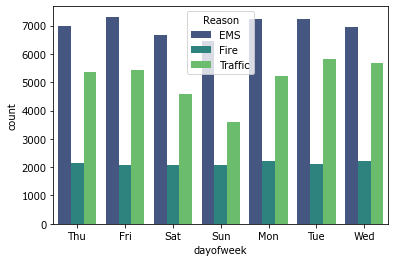

In [20]:
sns.countplot(data=df, x="dayofweek", y=None, hue ="Reason",palette="viridis")

Doing the same for Month:**

<AxesSubplot:xlabel='Month', ylabel='count'>

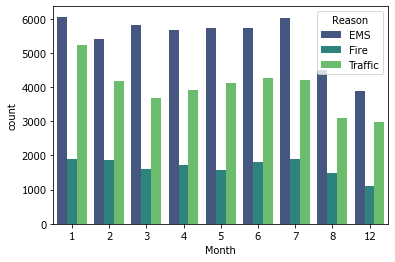

In [21]:
sns.countplot(data=df, x="Month", y=None, hue ="Reason",palette="viridis")

**Did you notice something strange about the Plot?**

_____
### We should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas...

** Now creating a gropuby object called byMonth, where we group the DataFrame by the month column and use the count() method for aggregation. Using the head() method on this returned DataFrame. **

In [22]:
byMonth = df.groupby("Month").count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,Year,dayofweek
Month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423


## Now creating a simple plot off of the dataframe indicating the count of calls per month. 

<AxesSubplot:xlabel='Month'>

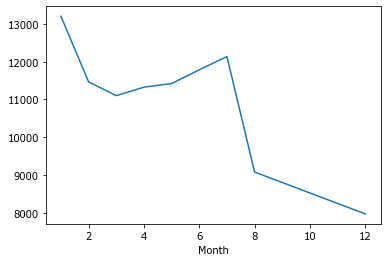

In [23]:
byMonth["lat"].plot()

### Now see if we can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind we may need to reset the index to a column. 

In [24]:
byMonth = byMonth.reset_index()
byMonth.head()

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,Year,dayofweek
0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
3,4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
4,5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423


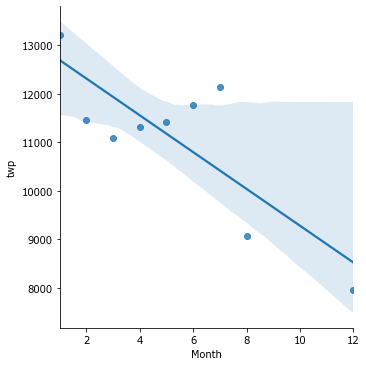

In [25]:
sns.lmplot(data=byMonth, x="Month",y="twp")

### Creating a new column called 'Date' that contains the date from the timeStamp column. We'll need to use apply along with the .date() method.

In [26]:
df["Date"] = df["timeStamp"].apply(lambda x: x.date())

### Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.

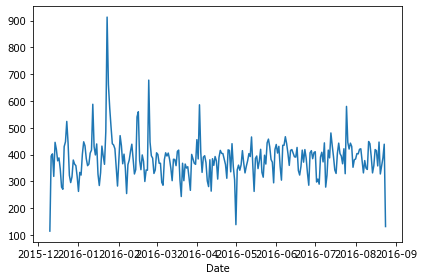

In [27]:
df.groupby("Date").count()["twp"].plot()
plt.tight_layout()

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

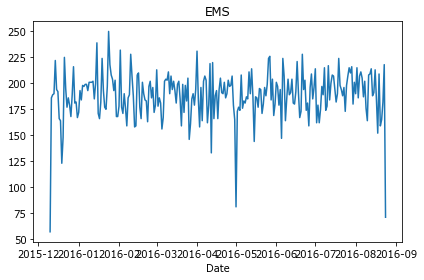

In [28]:
df_traffic = df[df['Reason'] == 'EMS']
df_traffic.groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

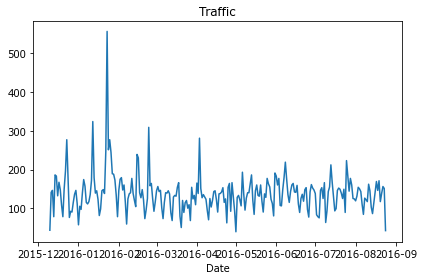

In [29]:
df_traffic = df[df['Reason'] == 'Traffic']
df_traffic.groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

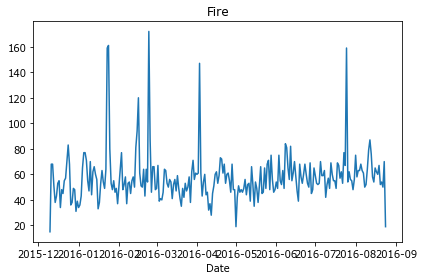

In [30]:
df_traffic = df[df['Reason'] == 'Fire']
df_traffic.groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

### Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack] method.

In [31]:
newdfhour = df.groupby(["dayofweek","hour"]).count().unstack()['Reason']
newdfhour.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
dayofweek,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


## Now creating a HeatMap using this new DataFrame. 

<AxesSubplot:xlabel='hour', ylabel='dayofweek'>

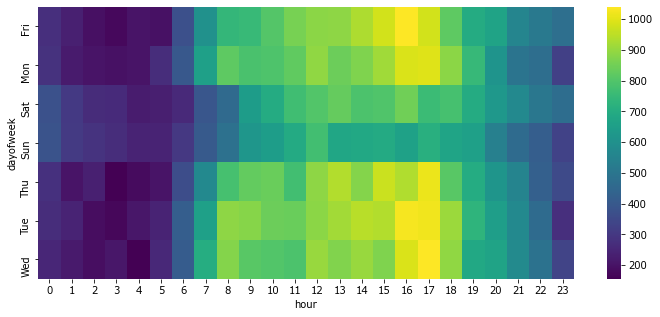

In [32]:
plt.figure(figsize=(12,5))
sns.heatmap(newdfhour,cmap= "viridis")

## Now creating a clustermap using this DataFrame. 

<Figure size 720x360 with 0 Axes>

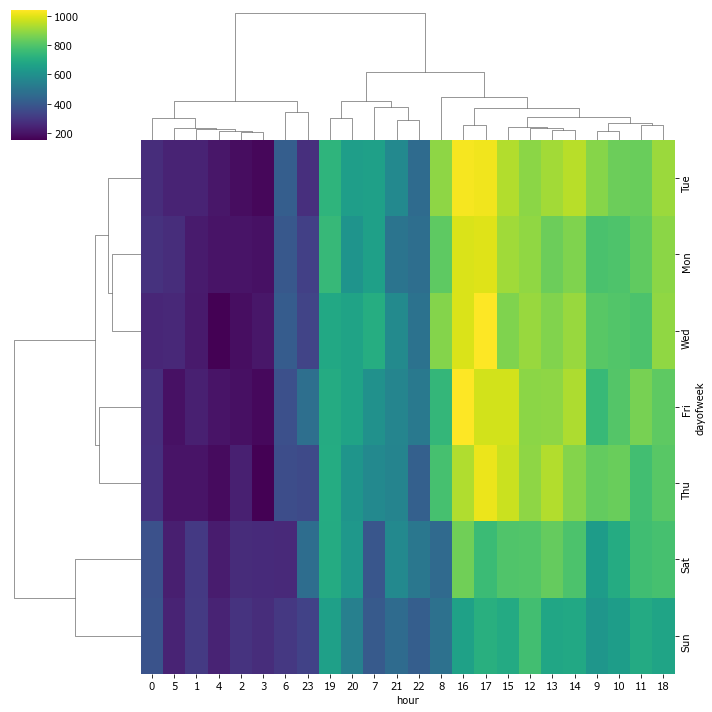

In [33]:
plt.figure(figsize=(10,5))
sns.clustermap(newdfhour,cmap= "viridis")

### Now repeating the same plots and operations, for a DataFrame that shows the Month as the column. 

In [34]:
newdfmonth = df.groupby(["dayofweek","Month"]).count().unstack()['Reason']
newdfmonth.head()

Month,1,2,3,4,5,6,7,8,12
dayofweek,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


<AxesSubplot:xlabel='hour', ylabel='dayofweek'>

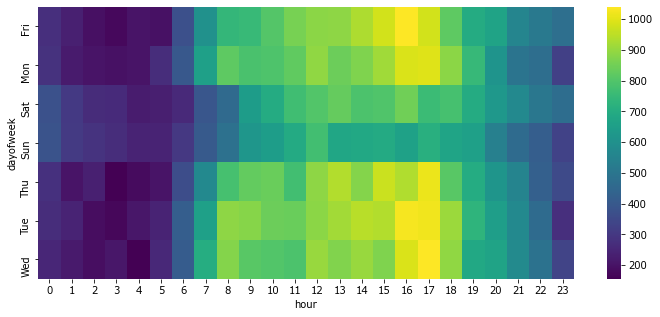

In [35]:
plt.figure(figsize=(12,5))
sns.heatmap(newdfhour,cmap= "viridis")

<Figure size 720x360 with 0 Axes>

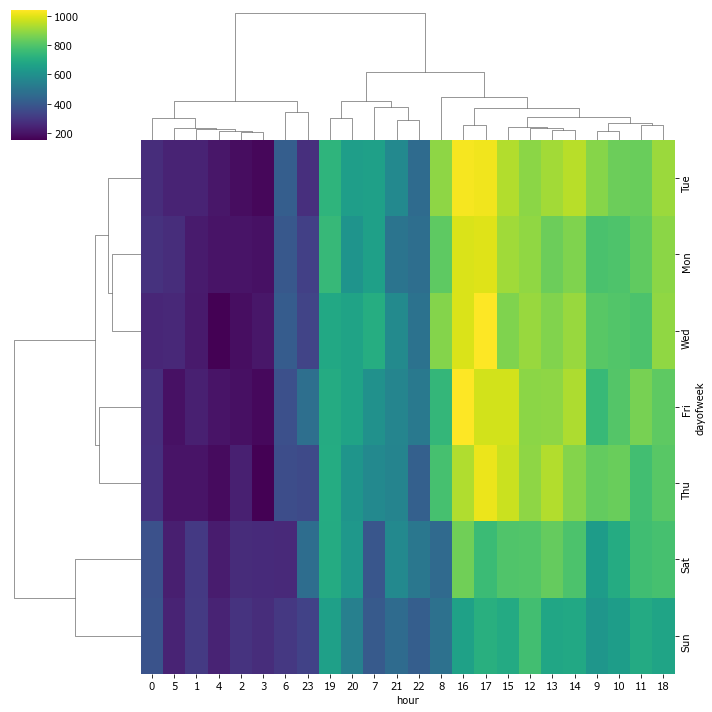

In [36]:
plt.figure(figsize=(10,5))
sns.clustermap(newdfhour,cmap= "viridis")